### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [16]:
data = pd.read_csv('data/coupons.csv')

In [17]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [19]:
# Rename some of the data to make it make more sense
str_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[str_cols] = data[str_cols].replace('gt8', '>8').replace('less1', '<1').replace('1~3', '1-3').replace('4~8', '4-8').replace('never', '0')
data['Bar'].unique()

array(['0', '<1', '1-3', '>8', nan, '4-8'], dtype=object)

In [20]:
# Rename some of the data to make it make more sense
data['age'] = data['age'].str.replace('50plus', '>50').str.replace('below21', '<21')
data['age'].unique()

array(['21', '46', '26', '31', '41', '>50', '36', '<21'], dtype=object)

In [21]:
# The 'car' column has a lot of null values and the existing values aren't helpful, so drop it
data = data.drop('car', axis=1)

3. Decide what to do about your missing data -- drop, replace, other...

In [22]:
# Rename the "passanger" column to spell it correctly
data = data.rename(columns={"passanger" : "passenger"})
data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

4. What proportion of the total observations chose to accept the coupon? 



In [23]:
proportion = data['Y'].value_counts()[1]/data.shape[0]
print(proportion)
# About 57% of total observations accepted the coupon

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [24]:
px.bar(data, x="coupon")

6. Use a histogram to visualize the temperature column.

In [25]:
px.histogram(data, x="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [27]:
barCoupons = data.loc[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [28]:
proportionBar = barCoupons['Y'].value_counts()[1]/barCoupons.shape[0]
print(proportionBar)
print()
print('About 41% of bar coupons were accepted')

0.41001487357461575

About 41% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [29]:
threeOrFewer = barCoupons.loc[(barCoupons['Bar'] == '0') | (barCoupons['Bar'] == '1-3') | (barCoupons['Bar'] == '<1')]
moreThanThree = barCoupons.loc[(barCoupons['Bar'] == '4-8') | (barCoupons['Bar'] == '>8')]
lowBarProportion = threeOrFewer['Y'].value_counts()[1]/threeOrFewer.shape[0]
highBarProportion = moreThanThree['Y'].value_counts()[1]/moreThanThree.shape[0]
print(f'Acceptance rate of those who went to a bar 3 or fewer times a month - {lowBarProportion}')
print(f'Acceptance rate of those who went to a bar more than 3 a month - {highBarProportion}')
print()
print('People who only go to a bar 3 or fewer times a month accepted the coupons about 37% of the time, while people who go to the bar more than that accepted them at about a 77% rate.')

Acceptance rate of those who went to a bar 3 or fewer times a month - 0.37061769616026713
Acceptance rate of those who went to a bar more than 3 a month - 0.7688442211055276

People who only go to a bar 3 or fewer times a month accepted the coupons about 37% of the time, while people who go to the bar more than that accepted them at about a 77% rate.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [30]:
multiBarAndOld = barCoupons.loc[(-barCoupons['Bar'].isin(['<1', '0']) ) & (-barCoupons['age'].isin(['21', '<21']))]
multiBarAndOldProportion = multiBarAndOld['Y'].value_counts()[1]/multiBarAndOld.shape[0]
print(f'Acceptance rate of those who went to a bar more than once a month and are over 25 - {multiBarAndOldProportion}')
print(f'Overall acceptance rate of bar coupons - {proportionBar}')
print()
print('People who go to a bar more than once a month and are over the age of 25 accept the bar coupons at about a 68% proportion, compared to 41% overall.')

Acceptance rate of those who went to a bar more than once a month and are over 25 - 0.6818181818181818
Overall acceptance rate of bar coupons - 0.41001487357461575

People who go to a bar more than once a month and are over the age of 25 accept the bar coupons at about a 68% proportion, compared to 41% overall.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [31]:
q5 = barCoupons.loc[(barCoupons['Bar'].isin(['0', '<1'])) & (barCoupons['passenger'].isin(['Friend(s)', 'Parther'])) & (barCoupons['occupation']!= 'Farming Fishing & Forestry')]

q5Proportion = q5['Y'].value_counts()[1]/q5.shape[0]
print(f'Acceptance rate of those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry - {q5Proportion}')
print(f'Overall acceptance rate of bar coupons - {proportionBar}')
print()
print('People who go to a bar more than once a month and are over the age of 25 accept the bar coupons at about a 43.3% proportion, compared to 41% overall.')

Acceptance rate of those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry - 0.43333333333333335
Overall acceptance rate of bar coupons - 0.41001487357461575

People who go to a bar more than once a month and are over the age of 25 accept the bar coupons at about a 43.3% proportion, compared to 41% overall.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [32]:
q6 = barCoupons.loc[((barCoupons['Bar'].isin(['0', '<1'])) & (barCoupons['passenger'].isin(['Friend(s)', 'Parther'])) & (barCoupons['maritalStatus'] != 'Widowed')) | ((barCoupons['Bar'].isin(['0', '<1'])) & (-barCoupons['age'].isin(['21', '<21', '26']))) | ((barCoupons['RestaurantLessThan20'].isin(['4-8', '>8'])) & (barCoupons['income'].isin(['Less than $12500', '$12500 - $24999', '$37500 - $49999'])))]          
q6Proportion = q6['Y'].value_counts()[1]/q6.shape[0]
print(f'Acceptance rate of the group specified in question 6 - {q6Proportion}')
print(f'Overall acceptance rate of bar coupons - {proportionBar}')
print()
print('People in the group outlined in question 6 accept the bar coupons at about a 32% rate, compared to 41% overall.')

Acceptance rate of the group specified in question 6 - 0.3225516621743037
Overall acceptance rate of bar coupons - 0.41001487357461575

People in the group outlined in question 6 accept the bar coupons at about a 32% rate, compared to 41% overall.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [33]:
print("Based on the last few questions, those who go to bars more frequently are more likely to accept the bar coupons. Also, having kids in the car reduced the likelihood that someone would accept the bar coupons.")

Based on the last few questions, those who go to bars more frequently are more likely to accept the bar coupons. Also, having kids in the car reduced the likelihood that someone would accept the bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [34]:
# I'm choosing to explore the Coffee House coupon group. First, create a new dataframe for this type of coupon, similarly to how we created the barCoupons dataframe
coffeeCoupons = data.loc[data['coupon'] == 'Coffee House']
coffeeCoupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passenger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null  

I'll create some plots to visualize the differences between the group of those who accepted the coupons and those who didn't, in order to identify any obvious trends. I chose certain columns that I thought were worth investigating.

In [43]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'passenger'], color='passenger', title = 'Acceptance and Type of Passenger(s)')
fig.show()
fig.write_image("../images/passengersSunburst.png")

In [44]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'destination'], color='destination', title = 'Acceptance and Destination')
fig.show()
fig.write_image("../images/destinationSunburst.png")

In [45]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'weather'], color='weather', title = 'Acceptance and Weather')
fig.show()
fig.write_image("../images/weatherSunburst.png")

In [46]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'temperature'], color='temperature', title = 'Acceptance and Temperature')
fig.show()
fig.write_image("../images/tempSunburst.png")

In [47]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'time'], color='time', title = 'Acceptance and Time')
fig.show()
fig.write_image("../images/timeSunburst.png")

In [48]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'expiration'], color='expiration', title = 'Acceptance and Expiration')
fig.show()
fig.write_image("../images/expirationSunburst.png")

In [49]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'maritalStatus'], color='maritalStatus', title = 'Acceptance and Marital Status')
fig.show()
fig.write_image("../images/maritalStatusSunburst.png")

In [50]:
fig = px.sunburst(coffeeCoupons, path=['Y', 'has_children'], color='has_children', title = 'Acceptance and Children')
fig.show()
fig.write_image("../images/childrenSunburst.png")

In [51]:
fig = px.sunburst(coffeeCoupons.dropna(), path=['Y', 'CoffeeHouse'], color='CoffeeHouse', title = 'Acceptance and Coffee House Visits')
fig.show()
fig.write_image("../images/coffeeHouseVisitsSunburst.png")

These plotly plots may not show up on Github, so I included them in a separate images folder.

These sunburst plots are a good way to visualize how drivers' characteristics differ across those who accepted the coupon and those who didn't. Based on the plots I made, the characteristics that didn't have a strong relationship with whether the driver accepted the coupon or not include temperature, marital status, and if they had children. Some noticable trends were present in the group of plots as well. People seem slightly more likely to accept the coupon if they had friends in the car, and slightly less likely to accept if they were alone. They also were more likely to accept the coupon if they had no urgent destination. In regards to time of day, most time slots had similar proportions in both groups, but 10 AM made it more likely that people would accept and 6 PM made it less likely that they would. More people accepted the coupons if they expired in a day and not 2 hours. Finally, it was clear that people who never go to coffee shops or went rarely accepted the coupons less than those who go to coffee shops.

Next, I did more investigation of the categories that seemed to have some correlation with the coupon acceptance rate.

<Axes: xlabel='CoffeeHouse', ylabel='count'>

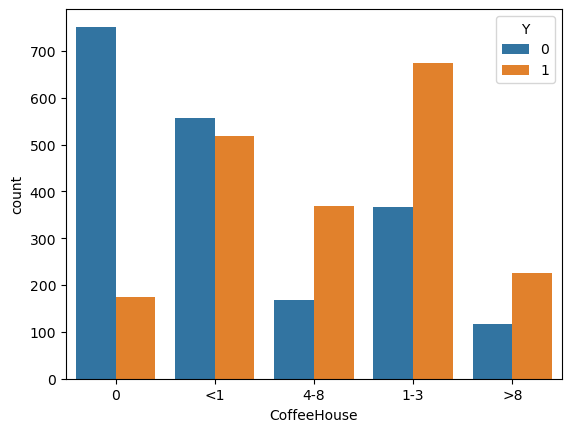

In [30]:
sns.countplot(coffeeCoupons, x='CoffeeHouse', hue='Y')

In [31]:
coffeeRegulars = coffeeCoupons.loc[-coffeeCoupons['CoffeeHouse'].isin(['<1', '0'])]
coffeeRegularsAcceptance = coffeeRegulars['Y'].value_counts()[1]/coffeeRegulars.shape[0]
overallCoffeeAcceptance = coffeeCoupons['Y'].value_counts()[1]/coffeeCoupons.shape[0]
print(f'Acceptance rate of those who went to a coffee house at least once a month - {coffeeRegularsAcceptance}')
print(f'Overall acceptance rate of coffee house coupons - {overallCoffeeAcceptance}')
print()
print('People who went to a coffee house at least once a month accept the coffee coupons at about a 65% rate, compared to 50% overall.')

Acceptance rate of those who went to a coffee house at least once a month - 0.6529588766298897
Overall acceptance rate of coffee house coupons - 0.49924924924924924

People who went to a coffee house at least once a month accept the coffee coupons at about a 65% rate, compared to 50% overall.


<Axes: xlabel='expiration', ylabel='count'>

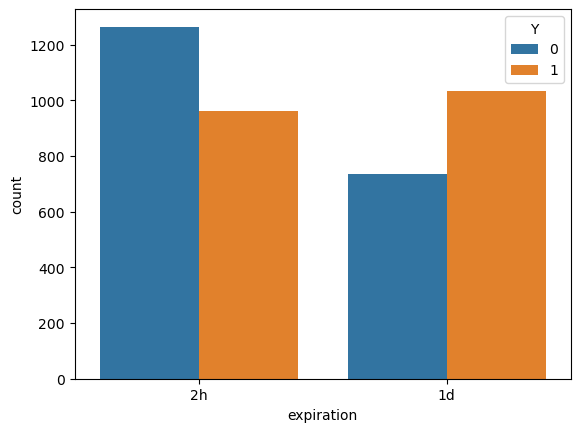

In [32]:
sns.countplot(coffeeCoupons, x='expiration', hue='Y')

In [33]:
coffeeExpiration = coffeeCoupons.groupby('expiration').agg('mean')[['Y']]
print(coffeeExpiration.head())
print()
print('People who received coupons that expire in 1 day accept the coupons at about a 58.4% rate, compared to 43.2% for coupons that expire in 2 hours')


                   Y
expiration          
1d          0.583946
2h          0.431971

People who received coupons that expire in 1 day accept the coupons at about a 58.4% rate, compared to 43.2% for coupons that expire in 2 hours


<Axes: xlabel='destination', ylabel='count'>

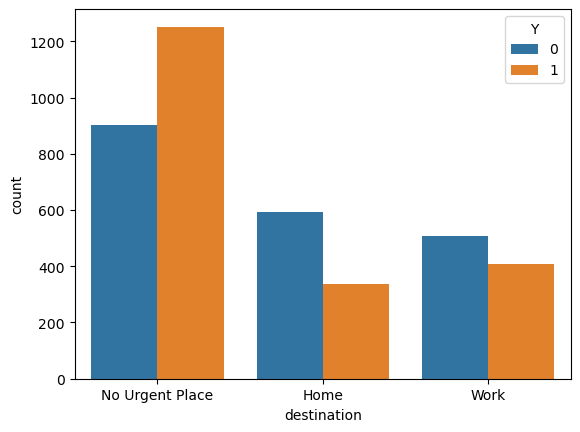

In [34]:
sns.countplot(coffeeCoupons, x='destination', hue='Y')

In [35]:
coffeeDestination = coffeeCoupons.groupby('destination').agg('mean')[['Y']]
print(coffeeDestination.head())
print()
print('Drivers who had no urgent destination accepted the coupons at around a 58.1% rate, compared to just 44.6% when they are going to work and 36.2% when going home.')


                        Y
destination              
Home             0.362069
No Urgent Place  0.580974
Work             0.445783

Drivers who had no urgent destination accepted the coupons at around a 58.1% rate, compared to just 44.6% when they are going to work and 36.2% when going home.


<Axes: xlabel='time', ylabel='count'>

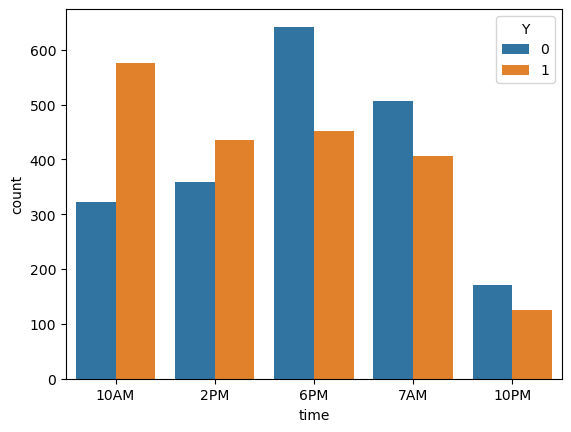

In [36]:
sns.countplot(coffeeCoupons, x='time', hue='Y')

In [37]:
coffeeTime = coffeeCoupons.groupby('time').agg('mean')[['Y']]
print(coffeeTime.head())
print()
print("Drivers are more likely to accept the coupon at 10AM and 2PM, and do so the majority of the time. However, they are relatively unlikely to accept it outside of those times, accepting the coupons less than 50% of the time at other times of day.")

             Y
time          
10AM  0.640712
10PM  0.424242
2PM   0.547859
6PM   0.412626
7AM   0.445783

Drivers are more likely to accept the coupon at 10AM and 2PM, and do so the majority of the time. However, they are relatively unlikely to accept it outside of those times, accepting the coupons less than 50% of the time at other times of day.


<Axes: xlabel='passenger', ylabel='count'>

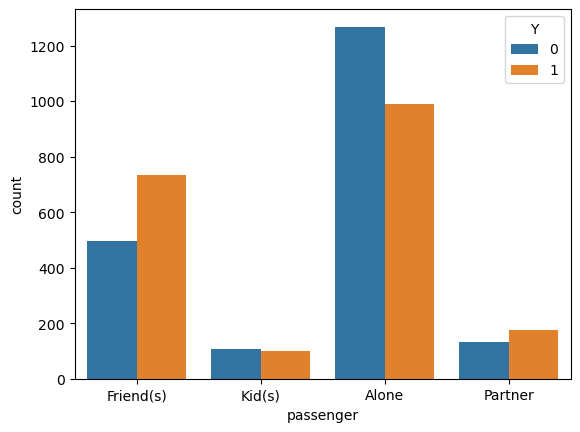

In [38]:
sns.countplot(coffeeCoupons, x='passenger', hue='Y')

In [39]:
coffeePassengers = coffeeCoupons.groupby('passenger').agg('mean')[['Y']]
print(coffeePassengers.head())
print()
print("Drivers are more likely to accept the coupon when with friend(s) or their partner as passengers, and less likely to accept it when alone or with their kids.")

                  Y
passenger          
Alone      0.437943
Friend(s)  0.596906
Kid(s)     0.483092
Partner    0.570492

Drivers are more likely to accept the coupon when with friend(s) or their partner as passengers, and less likely to accept it when alone or with their kids.


In [40]:
idealCoffeeCouponTarget = coffeeCoupons.loc[((-coffeeCoupons['CoffeeHouse'].isin(['<1', '0'])) & (coffeeCoupons['passenger'].isin(['Friend(s)', 'Partner'])) & (coffeeCoupons['expiration'] == '1d') & (coffeeCoupons['time'] == '10AM') & (coffeeCoupons['destination'] == 'No Urgent Place'))]
idealCoffeeCouponAcceptance = idealCoffeeCouponTarget['Y'].value_counts()[1]/idealCoffeeCouponTarget.shape[0]
print(idealCoffeeCouponAcceptance)

0.8666666666666667


Out of curiosity, I filtered the dataframe by the ideal conditions for coffee coupon acceptance to see the rate that these ideal conditions would yield. I selected only those drivers who were with either friends or their partner, at 10AM, with no urgent destination, and go to the coffee house at least once a month, who received a coupon that expires in one day. This group accepted the coupons 86.67% of the time. 

## Findings/Conclusion/Next Steps

Based on the analysis of the data on coffee house coupons, I was able to identify several differences between groups that accepted the coupons and those that didn't. I'll summarize these findings in different categories.

### Number of Times Visiting Coffee House

Drivers who tended to go to the coffee house more often were also more likely to accept the coffee coupons. This seems logical; those who never or rarely go buy coffee probably just don't like coffee to begin with, so sending them coupons won't be very effective in getting them to go buy some.

### Duration Until Coupon Expires

It was clear from the data that drivers are more likely to accept the coupon if they have a day until it expires rather than if they only have 2 hours.  

### Destination

People with no urgent destination accepted the coupons at a much higher rate than people who were driving either home or to work. It makes sense that this would be the case, as people are often in a rush when driving to home or work and might not have time to stop and buy coffee, even when getting a discount. People who aren't going anywhere in particular probably have more time to stop and randomly buy coffee. 

### Time of Day

The time at which people were most likely to accept the coupons was 10 AM, followed by 2 PM, and the majority of coupons at these times were accepted. Other times of day were less effective times to send out coupons, as less than 50% of coupons sent at those times were accepted. 

### Next Steps

Based on the findings from this notebook, we can tailor our advertising campaign to be more efficient. We should focus on sending coupons to people that fit these ideal characteristics if possible - visit coffee houses regularly, driving to no urgent destination, and have either friend(s) or partner as their passenger. Obviously it will be impossible to identify who fits these categories all the time, but knowing that these types of people accept the coupons more often will help us tailor our advertising campaign. Coupons should be sent out mainly around 10 AM and 2 PM, and other times like 7 AM, 6 PM, and 10 PM should be avoided. Also, coupons should have 1 day expiration times, not 2 hours. There's also potential for experimentation with longer expiration times, to see the effect of that.
